In [ ]:
!pip install matplotlib

In [ ]:
!conda install matplotlib

In [ ]:
y

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt  

In [2]:
# Import for visualization# 1. Load the data
df = pd.read_csv('/Users/payalbhandwalkar/Desktop/Projects/predictive_maintenance.csv')

In [24]:
df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [26]:
# Check for missing values
print(df.isnull().sum())


UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


In [28]:
# One-hot encoding for "Type"
df = pd.get_dummies(df, columns=["Type"], drop_first=True)

# Convert "Failure Type" to a binary indicator
df["Failure Type"] = df["Failure Type"].apply(lambda x: 0 if x == "No Failure" else 1)

# Display updated data types
print(df.dtypes)


UDI                          int64
Product ID                  object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                 int64
Type_L                        bool
Type_M                        bool
dtype: object


In [30]:
# Drop unnecessary columns
df.drop(columns=["UDI", "Product ID"], inplace=True)

# Display the updated dataset
print(df.head())


   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                298.1                    308.6                    1551   
1                298.2                    308.7                    1408   
2                298.1                    308.5                    1498   
3                298.2                    308.6                    1433   
4                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Target  Failure Type  Type_L  Type_M  
0         42.8                0       0             0   False    True  
1         46.3                3       0             0    True   False  
2         49.4                5       0             0    True   False  
3         39.5                7       0             0    True   False  
4         40.0                9       0             0    True   False  


In [32]:
# Check class balance
print(df["Target"].value_counts(normalize=True))


Target
0    0.9661
1    0.0339
Name: proportion, dtype: float64


In [36]:
!pip install imbalanced-learn

In [38]:
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df.drop(columns=["Target"])
y = df["Target"]

# Apply SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Increase failure cases to 50% of non-failures
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print new class distribution
print(y_resampled.value_counts(normalize=True))


Target
0    0.66669
1    0.33331
Name: proportion, dtype: float64


In [40]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Apply scaling to features
X_scaled = scaler.fit_transform(X_resampled)

# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Display first few rows
print(X_scaled.head())


   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0            -1.113576                -1.089693                0.112926   
1            -1.063022                -1.017493               -0.445754   
2            -1.113576                -1.161893               -0.094137   
3            -1.063022                -1.089693               -0.348082   
4            -1.063022                -1.017493               -0.445754   

   Torque [Nm]  Tool wear [min]  Failure Type    Type_L    Type_M  
0    -0.034312        -1.748138     -0.688158 -1.496791  1.414067  
1     0.236293        -1.704069     -0.688158  0.668096 -0.707180  
2     0.475972        -1.674690     -0.688158  0.668096 -0.707180  
3    -0.289454        -1.645311     -0.688158  0.668096 -0.707180  
4    -0.250796        -1.615932     -0.688158  0.668096 -0.707180  


In [42]:
from sklearn.model_selection import train_test_split

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Print the shape of train and test sets
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (11592, 8)
Test set size: (2899, 8)


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9951707485339772

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1933
           1       0.99      0.99      0.99       966

    accuracy                           1.00      2899
   macro avg       1.00      0.99      0.99      2899
weighted avg       1.00      1.00      1.00      2899



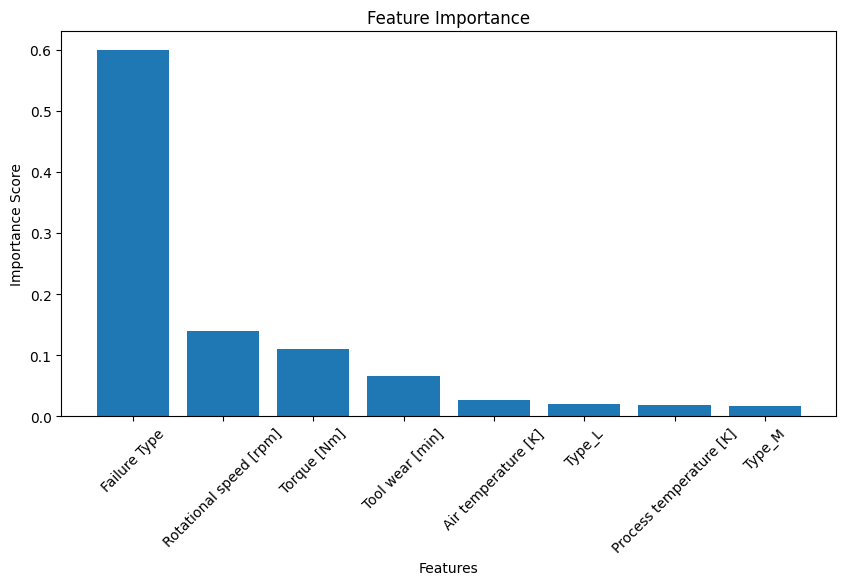

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Sort in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

In [48]:
import random
import pandas as pd

# Generate simulated IoT sensor data
def generate_live_data():
    return {
        "Air temperature [K]": random.uniform(290, 310),
        "Process temperature [K]": random.uniform(300, 320),
        "Rotational speed [rpm]": random.randint(1200, 3000),
        "Torque [Nm]": random.uniform(30, 70),
        "Tool wear [min]": random.randint(0, 250),
        "Failure Type": random.randint(0, 1),
        "Type_L": random.choice([True, False]),
        "Type_M": random.choice([True, False])
    }

# Convert to DataFrame
live_data = pd.DataFrame([generate_live_data()])
print(live_data)


   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0            291.43788               316.630572                    1792   

   Torque [Nm]  Tool wear [min]  Failure Type  Type_L  Type_M  
0    54.880647               24             1    True   False  


In [50]:
live_data_scaled = scaler.transform(live_data)
live_data_scaled = pd.DataFrame(live_data_scaled, columns=live_data.columns)

print(live_data_scaled)


   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0            -4.481565                 4.708365                1.054476   

   Torque [Nm]  Tool wear [min]  Failure Type    Type_L   Type_M  
0     0.899712        -1.395589      1.453155  0.668096 -0.70718  


In [52]:
# Predict failure
prediction = rf_model.predict(live_data_scaled)

if prediction[0] == 1:
    print("⚠️ Anomaly Detected: Potential Equipment Failure!")
else:
    print("✅ No Issues Detected.")


⚠️ Anomaly Detected: Potential Equipment Failure!
